In [1]:
import pandas as pd
import numpy as np
import re
import ast
import pandas as pd
import numpy as np
import re
import ast
import matplotlib as plt
import seaborn as sns
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import os
import random
import matplotlib
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

import gc

In [2]:

path_data = "..\\..\\data\\"
path_processed = "..\\..\\data\\processed\\"
sonido = "..\\..\\figures\\"

In [3]:
df = pd.read_csv(path_data + 'movies.csv')
print(f"Dataset size: {df.shape}")

Dataset size: (10197, 3)


In [4]:
df.head()

,id,title,year
0,1,Toy story,1995
1,2,Jumanji,1995
2,3,Grumpy Old Men,1993
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [5]:
train = pd.read_csv(path_data + 'ratings_train.csv.zip',dtype={'ID': 'int32', 'movieID': 'int32', 'rating': 'float32'})
print(f"Dataset size: {train.shape}")

Dataset size: (770089, 9)


In [6]:
test = pd.read_csv(path_data + 'ratings_test.csv.zip',dtype={'ID': 'int32', 'movieID': 'int32', 'rating': 'float32'})
print(f"Dataset size: {test.shape}")

Dataset size: (85509, 9)


from pandas_profiling import ProfileReport
prof = ProfileReport(rating_traing)
prof.to_file(output_file='rating_traing.html')

prof2 = ProfileReport(rating_test)
prof2.to_file(output_file='rating_test.html')

In [7]:
train.head()

,ID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
0,1,608,5.0,17,9,1997,23,40,20
1,2,141,4.0,17,9,1997,23,41,58
2,3,1073,4.0,17,9,1997,23,41,6
3,4,356,4.0,17,9,1997,23,43,44
4,5,1198,5.0,17,9,1997,23,44,35


In [8]:
train.rating.unique()

array([5. , 4. , 3. , 2. , 1. , 3.5, 2.5, 4.5, 0.5, 1.5], dtype=float32)

In [9]:
len(train.rating.unique())

10

In [10]:
len(train.movieID.unique())

10046

In [11]:
import random
random.seed(100)
random_state = 100

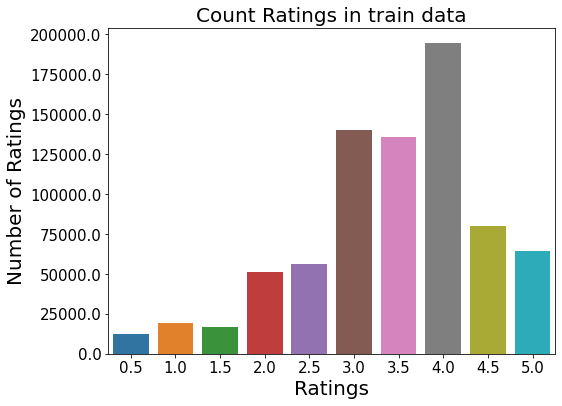

In [12]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x="rating", data=train)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Count Ratings in train data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

In [14]:
train.head()

,ID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
0,1,608,5.0,17,9,1997,23,40,20
1,2,141,4.0,17,9,1997,23,41,58
2,3,1073,4.0,17,9,1997,23,41,6
3,4,356,4.0,17,9,1997,23,43,44
4,5,1198,5.0,17,9,1997,23,44,35


In [17]:
train = train.dropna()

In [33]:
X = train["date_hour"]
y = train['rating']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from nltk import word_tokenize, sent_tokenize                    
from sklearn.linear_model import LinearRegression

In [36]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').